In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
Data['Date']=pd.to_datetime(Data['Date'])
Data=Data.set_index(['Date'])
df=Data[['RF','MKT']].copy()
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647 entries, 1963-02-28 to 2016-12-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RF                647 non-null    float64
 1   MKT               647 non-null    float64
 2   USA30yearGovBond  647 non-null    float64
 3   EmergingMarkets   647 non-null    float64
 4   WorldxUSA         647 non-null    float64
 5   WorldxUSAGovBond  646 non-null    float64
dtypes: float64(6)
memory usage: 35.4 KB


# The Capital Allocation Line




* So far we looked at an investor that is fully invested across risky assets

* In this case, the only way that an investor can change the risk profile of her portfolio is by changing the relative weights across the risky assets

* In practice investors can invest in the risk-free asset, which has zero volatility. 

* This means that they can potentially derisk their portfolio by keeping the relative weights across assets constant and simply invest more in the risk-free asset

* So we will now work with excess returns and the risk-free rate, separating cleaning the risk-free component of these risky asset returns

* Empirically this separation of risky returns from the risk-free  cleanly separate what needs estimating (average excess returns of risky assets and their covariances) from the level of the risk-free rate at a given point in time which is observable

**Constructing excess returns**

In [8]:


#Try ommiting the axis paraemtner and see what you get. What happened?

Re=(Data[['MKT','WorldxUSA']]).subtract(Data['RF'],axis='index')

Re.tail()

,MKT,WorldxUSA
Date,,
2016-08-31,0.0050,0.000638
2016-09-30,0.0025,0.012536
2016-10-31,-0.0202,-0.020583
2016-11-30,0.0486,-0.019898
2016-12-31,0.0182,0.034083


**note:** axis parameters tells along whcih axes the subtraction occurs, i.e.
#along which dimension python matches both datasets

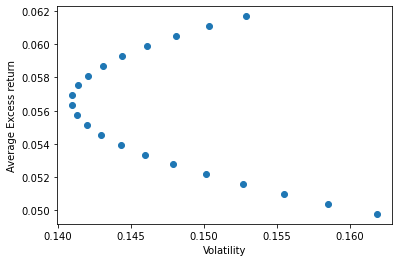

In [9]:
UsW=[]
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    UsW.append([1-x,(W.T @ Re.cov() @ W*12)**0.5,W.T @ np.array(Re.mean())*12])
UsW=np.array(UsW)
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Volatility')
plt.ylabel('Average Excess return')
plt.show()

**Adding the Risk-free Rate**

x: pins down vector of risky weights (x in the US market, 1-x in international market)

y: determines allocation between risk-free and risky-portfolio (y in the riskfree and 1-y on the risky portfolio)

Note that the expected return term is `+rf` instead of `+rf*y` because we are using excess return instead of return. To better understand, we write out the expected return in the following way where $R_W$ below is the return on the risky portfolio


$
\begin{align}
r_p&=y\times R_f + (1-y) \times R_W \\
&= y \times R_f + (1-y) \times E[(R_W-R_f)] + (1-y) \times R_f \\
&= (1-y) \times (R_W-R_f)] + R_f \\
&=(1-y) \times R_W^e + R_f
\end{align}
$

where $R^e_W$ is the **excess return** on the risky portolio.
$

Thus we can write:

\begin{align}
E[r_p]&=E[(1-y) \times R_W^e + R_f]\\
E[r_p]&=(1-y) \times E[R_W^e] + R_f
\end{align}


The math for the variance of the portfolio is particular case of what we learned last chapter

$
\begin{align}
Var[r_p]&=Var[(1-y) \times R_W^e + R_f] \\
Var[r_p]&=Var[(1-y) \times R_W^e] \\
&= (1-y)^2 Var[R_W^e]  
\end{align}
$


And the volatility (also called standard deviation)


$
\begin{align}
STD[r_p]&=\sqrt{Var[r_p]}\\
&=\sqrt{Var[(1-y) \times R_W^e + R_f]} \\
&=\sqrt{Var[(1-y) \times R_W^e]} \\
&= \sqrt{(1-y)^2 Var[R_W^e]}\\  
&= {(1-y)}{ STD[R_W^e]}
\end{align}
$

Lets start by combining one asset, say the US market with the risk-free rate using different weights on the risk-free rate and this particular risk portfolio

In [10]:


Y=np.arange(0,1.1,0.1)

print(Y)
# choosing some risk-free rate

rf=1/100/12

# I am settign to 1% per year. Divide by 100 to put in percent as the return data
# and divided by 12 to make it monthly as the return data

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


We know compute the averagereturn and the population volatility/variance for each of the portfolios associated with the weights in $wf$

In [11]:
UsW=[]
for y in Y:

        varW=Re.var().iloc[0]
        
        # variance of final portfolio since xf is the weight on the risk-free rate 
        # so 1-xf is the weight on the risky asset
        var=(1-y)**2*(varW)
        #expected excess return of risky portfolio
        erW=Re.mean().iloc[0]
        
        # expected return of finanl portfolio 
        er=erW*(1-y)+rf
        UsW.append([y,0,var**0.5,er])
UsW

[[0.0, 0, 0.04413587129386619, 0.005973673364245237],
 [0.1, 0, 0.03972228416447957, 0.005459639361154046],
 [0.2, 0, 0.035308697035092956, 0.004945605358062857],
 [0.30000000000000004, 0, 0.03089510990570633, 0.004431571354971665],
 [0.4, 0, 0.026481522776319714, 0.003917537351880475],
 [0.5, 0, 0.022067935646933094, 0.003403503348789285],
 [0.6000000000000001, 0, 0.01765434851754647, 0.0028894693456980943],
 [0.7000000000000001, 0, 0.013240761388159853, 0.002375435342606904],
 [0.8, 0, 0.008827174258773236, 0.0018614013395157137],
 [0.9, 0, 0.004413587129386618, 0.0013473673364245236],
 [1.0, 0, 0.0, 0.0008333333333333334]]

Lets now plot the resulting average return against sample volatility and variance

Text(0, 0.5, 'Average return')

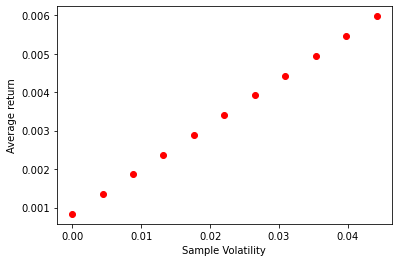

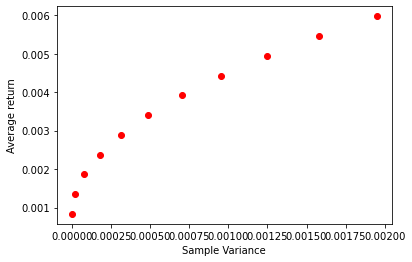

In [12]:
UsW=np.array(UsW)
# 2 is selecting the column with the volatility and 3 is selecting the column with the average excess return
fig, ax = plt.subplots()

ax.scatter(UsW[:,2],UsW[:,3],color='red')
# below I am using the boolean indexing UsW[:,0]==0 to select only portfolio with zero weight on the risk-free asset and plotting it in blue.
# recall that column 0 has the position on the risk-free asset

plt.xlabel('Sample Volatility')
plt.ylabel('Average return')

fig, ax = plt.subplots()

ax.scatter(UsW[:,2]**2,UsW[:,3],color='red')
# below I am using the boolean indexing UsW[:,0]==0 to select only portfolio with zero weight on the risk-free asset and plotting it in blue.
# recall that column 0 has the position on the risk-free asset


plt.xlabel('Sample Variance')
plt.ylabel('Average return')

You see clearly the relationship predicted by the formulas above

The Investment frontier in ExpectedReturn-volatility space is linear because as you increase your loading on the risky asset, both expected return and volatility grow proportionally

In variance space you see that variance grows faster---since it it standard deviation to the power of 2. 

So as you increase the loading o the risky asset, variance grows intially slower, and the much faster, hence the kind of concave increase in average returns

Now lets make this interesting

We will now at the same time vary the relative weight on the risk-free asset and the risky portfolio and change the coposition of the risky portoflio by changing the relative weight on the us market vs international market

We will accomplish this with the following double for loop

In [13]:
X=np.arange(0,1.1,0.1)
Y=np.arange(0,1.1,0.1)

UsW=[]
for y in Y:
    for x in X:
        #construct risky portfolio
        W=np.array([x,1-x])
        #variance of risky portfolio
        varW=W.T @ Re.cov() @ W
        # variance of final portfolio
        var=(1-y)**2*(varW)
        #expected excess return of risky portfolio
        erW=(W.T @ np.array(Re.mean()))
        # expected return of finanl portfolio 
        er=(W.T @ np.array(Re.mean()))*(1-y)+rf
        UsW.append([y,1-x,var**0.5,er])


Text(0, 0.5, 'Average return')

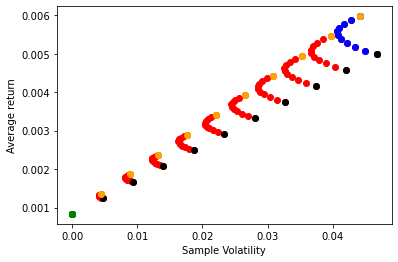

In [14]:
UsW=np.array(UsW)
fig, ax = plt.subplots()
# 2 is selecting the column with the volatility and 3 is selecting the column with the average excess return
ax.scatter(UsW[:,2],UsW[:,3],color='red')



# below I am using the boolean indexing UsW[:,0]==0 to select only portfolio with zero weight on the risk-free asset and plotting it in blue.
# recall that column 0 has the position on the risk-free asset
ax.scatter(UsW[UsW[:,0]==0,2],UsW[UsW[:,0]==0,3],color='blue')


ax.scatter(UsW[UsW[:,1]==1,2],UsW[UsW[:,1]==1,3],color='black')
ax.scatter(UsW[UsW[:,1]==0,2],UsW[UsW[:,1]==0,3],color='orange')
ax.scatter(UsW[UsW[:,0]==1,2],UsW[UsW[:,0]==1,3],color='green')

ax.set_xlabel('Sample Volatility')
ax.set_ylabel('Average return')



What do you see above?

- In orange the portfolios where the risky portfolio is exactly the US market, but has different weights on the risk-free asset
- In black you portfolio comprised of the international market but with different weights on the risk-free asset
- In blue you the portfolios that have exaclty zero weight on the risk-free rate, but different compositions of the risky portfolio
- in green you have the portfolio that has weight of 1 on the risk-free rate
- In red you have all the other portfolios which have varying risky portfolio compositions and varying weights combining this risky portfolio with the risk-free rate



* How to read this plot? Say you want a portoflio with at most 0.03 monthly volatility. What does this plot tell you?

* Which units are this? Can you convert it to annual units? How?

* what is noteworthy about the shape of these different curves?

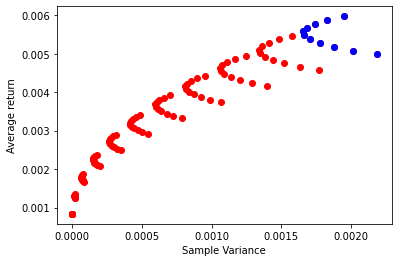

In [15]:
# in "variance space"

plt.scatter(UsW[:,2]**2,UsW[:,3],color='red')
plt.scatter(UsW[UsW[:,0]==0,2]**2,UsW[UsW[:,0]==0,3],color='blue')
plt.xlabel('Sample Variance')
plt.ylabel('Average return')

plt.show()

* It is clear that someone that would like a lower risk profile can achieve this objective through the use of the risk-free asset without impacting expected returns as much

* What about investors that would like to take more risk, can they benefit of the risk-free asset?

* yes, if they can borrow at the risk-free rate

It means that you agree to pays some rate of return in exchange for getting a dollar today to invest.

So you have a **negative** weight on the risk-free rate. 

Say if you have a weight of -0.5 on the risk-free rate it means that for each dollar that you have in your portfolio you are borrowing 0.5 and investing in the risky portolio 1.5 dollars

We say that you are are **leveraged** because your assets side (1.5 dollars) worth more than your networth (1 dollar) because you are borrowing the 0.5 dollars.

So lets see hat that looks like by considering negative weights on the risk-free asset  (y<0)

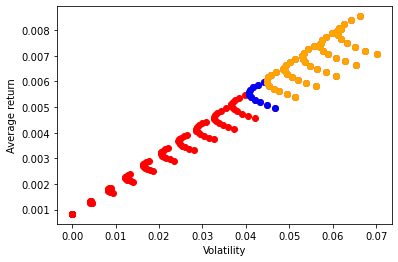

In [16]:
UsW=[]
X=np.arange(0,1.1,0.1)
Y=np.arange(0,1.1,0.1)

for y in Y:
    for x in X:
        W=np.array([x,1-x])
        UsW.append([y,1-x,(1-y)*(W.T @ Re.cov() @ W)**0.5,(W.T @ np.array(Re.mean()))*(1-y)+rf])


X=np.arange(0,1.1,0.1)
Y=np.arange(-0.5,0,0.1)


for y in Y:
    for x in X:
        W=np.array([x,1-x])
        UsW.append([y,1-x,(1-y)*(W.T @ Re.cov() @ W)**0.5,(W.T @ np.array(Re.mean()))*(1-y)+rf])

        
        
UsW=np.array(UsW)

plt.scatter(UsW[:,2],UsW[:,3],color='red')
plt.scatter(UsW[UsW[:,0]==0,2],UsW[UsW[:,0]==0,3],color='blue')
# Below I am usign boolean index to select portfolio that are short the risk-free asset (i.e. they are levered) and I a plotting them in orange

plt.scatter(UsW[UsW[:,0]<0,2],UsW[UsW[:,0]<0,3],color='orange')
plt.xlabel('Volatility')
plt.ylabel('Average return')

plt.show()

* What is the intepretation of a negative $x_f$? Doe it make sense?

* What is the interpretation of a $x_f$ above 1? Does it make sense?

* Is the investors likely to be able to borrow at the risk-free rate?